<a href="https://colab.research.google.com/github/Luna-luv/Kaggle_Study/blob/main/house_prices/house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Understanding Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.impute import SimpleImputer
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### index를 만들 때의 장점은 무엇인가
|비교항목||일반컬럼(id)|인덱스(id)|
|---||---|---|
|행 접근 방식||df[df['id']==x]|df.loc[x]|
|join, merge||`on='id'` 따로 명시|자동 index 기준|
|정렬||df.sort_values('id')|df.sort_index()|
|리샘플링/시계열 등||추가 처리 필요|인덱스로 바로 가능|

💡 `df.loc[x]` : 특정 행(x=고유번호)을 가져오는 함수
```
df.loc[102] -> 고유번호 102의 변수명과 데이터 하나씩 가져옴
df.loc[102, 'score'] -> 고유번호 102 행의 'score'변수의 데이터 가져옴
df.loc[[101, 103]] -> 여러 행 불러오기
```


### 🔍 iloc이 있는데 왜 고유번호 인덱싱을 할까??

|비교항목||iloc만 쓸 경우|고유 인덱스 쓰기(loc)|
|---||---|---|
|개념||위치 기반(n번째 행)|이름 기반(id, 날짜 등 변수명)|
|성능||느릴 수 있음(조건검색)|빠름(해시 인덱싱)|
|핵심 차이점||정렬을 바꾸거나, 데이터를 섞을 경우 행의 인덱스 변경|데이터가 섞여도 인덱스는 그대로 유지|

💡 `df.iloc[x]` : 특정 행(x번째 행)을 가져오는 함수

In [ ]:
train=pd.read_csv('/content/drive/MyDrive/house prices/train.csv', index_col=0)
test=pd.read_csv('/content/drive/MyDrive/house prices/test.csv', index_col=0)

print(f"train: {train.shape}")
print(f"test: {test.shape}")
train.head()

train: (1460, 80)
test: (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

### 수치형 변수 따로 뽑기
- MSSubClass 처럼 수치형 변수이지만 범주형 변수의 기능을 가지면 drop
`axis=0`은 행, `axis=1`은 열
=> 즉, **MSSubClass의 열을 drop** 하라는 것

- copy() 는 복사본 만들어서 원본 데이터 손실의 위험 예방하는 것

#### 수치형 변수 -> 이산형 변수, 연속형 변수

💡`.append()` : 리스트에 값을 하나씩 추가할 때 쓰는 함수(단, 하나씩만 추가 가능)

💡`.extend()` : 리스트에 여러 개를 추가하고 싶을 때 사용하는 함

In [ ]:
numeric_train = train.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).copy()
numeric_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
disc_num_var = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']
cont_num_var = []
for i in numeric_train.columns:
  if i not in disc_num_var:
    cont_num_var.append(i)

### append 대신??
1. extend() 사용
```python
cont_num_var = []
cont_num_var.extend([i for i in numeric_train.columns if i not in disc_num_var])
```
or

2. 리스트 내포
```python
cont_num_var = [i for i in numeric_train.columns if i not in disc_num_var]
```

>💡리스트 내포?
>
>```
>[원소 for 원소 in 반복가능한것 if 조건]
>```
>의미 : numeric_train.columns 에서 i를 하나씩 꺼내면서 i가 disc_num_var에 없으면 그걸 cont_num_var에 넣자

###❓그럼 왜 보통 append를 쓰나?
- 더 직관적(구조가 한 눈에 보임)
- 복잡한 조건이나 여러 줄 처리할 때는 오히려 리스트 내포가 불편

In [ ]:
cat_train = train.select_dtypes(include=['object']).copy()
cat_train['MSSubClass'] = train['MSSubClass']
cat_train.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'MSSubClass'],
      dtype='object')

## 1.1 Univariate Analysis

### hisplot, boxplot 으로 연속형 변수 시각화

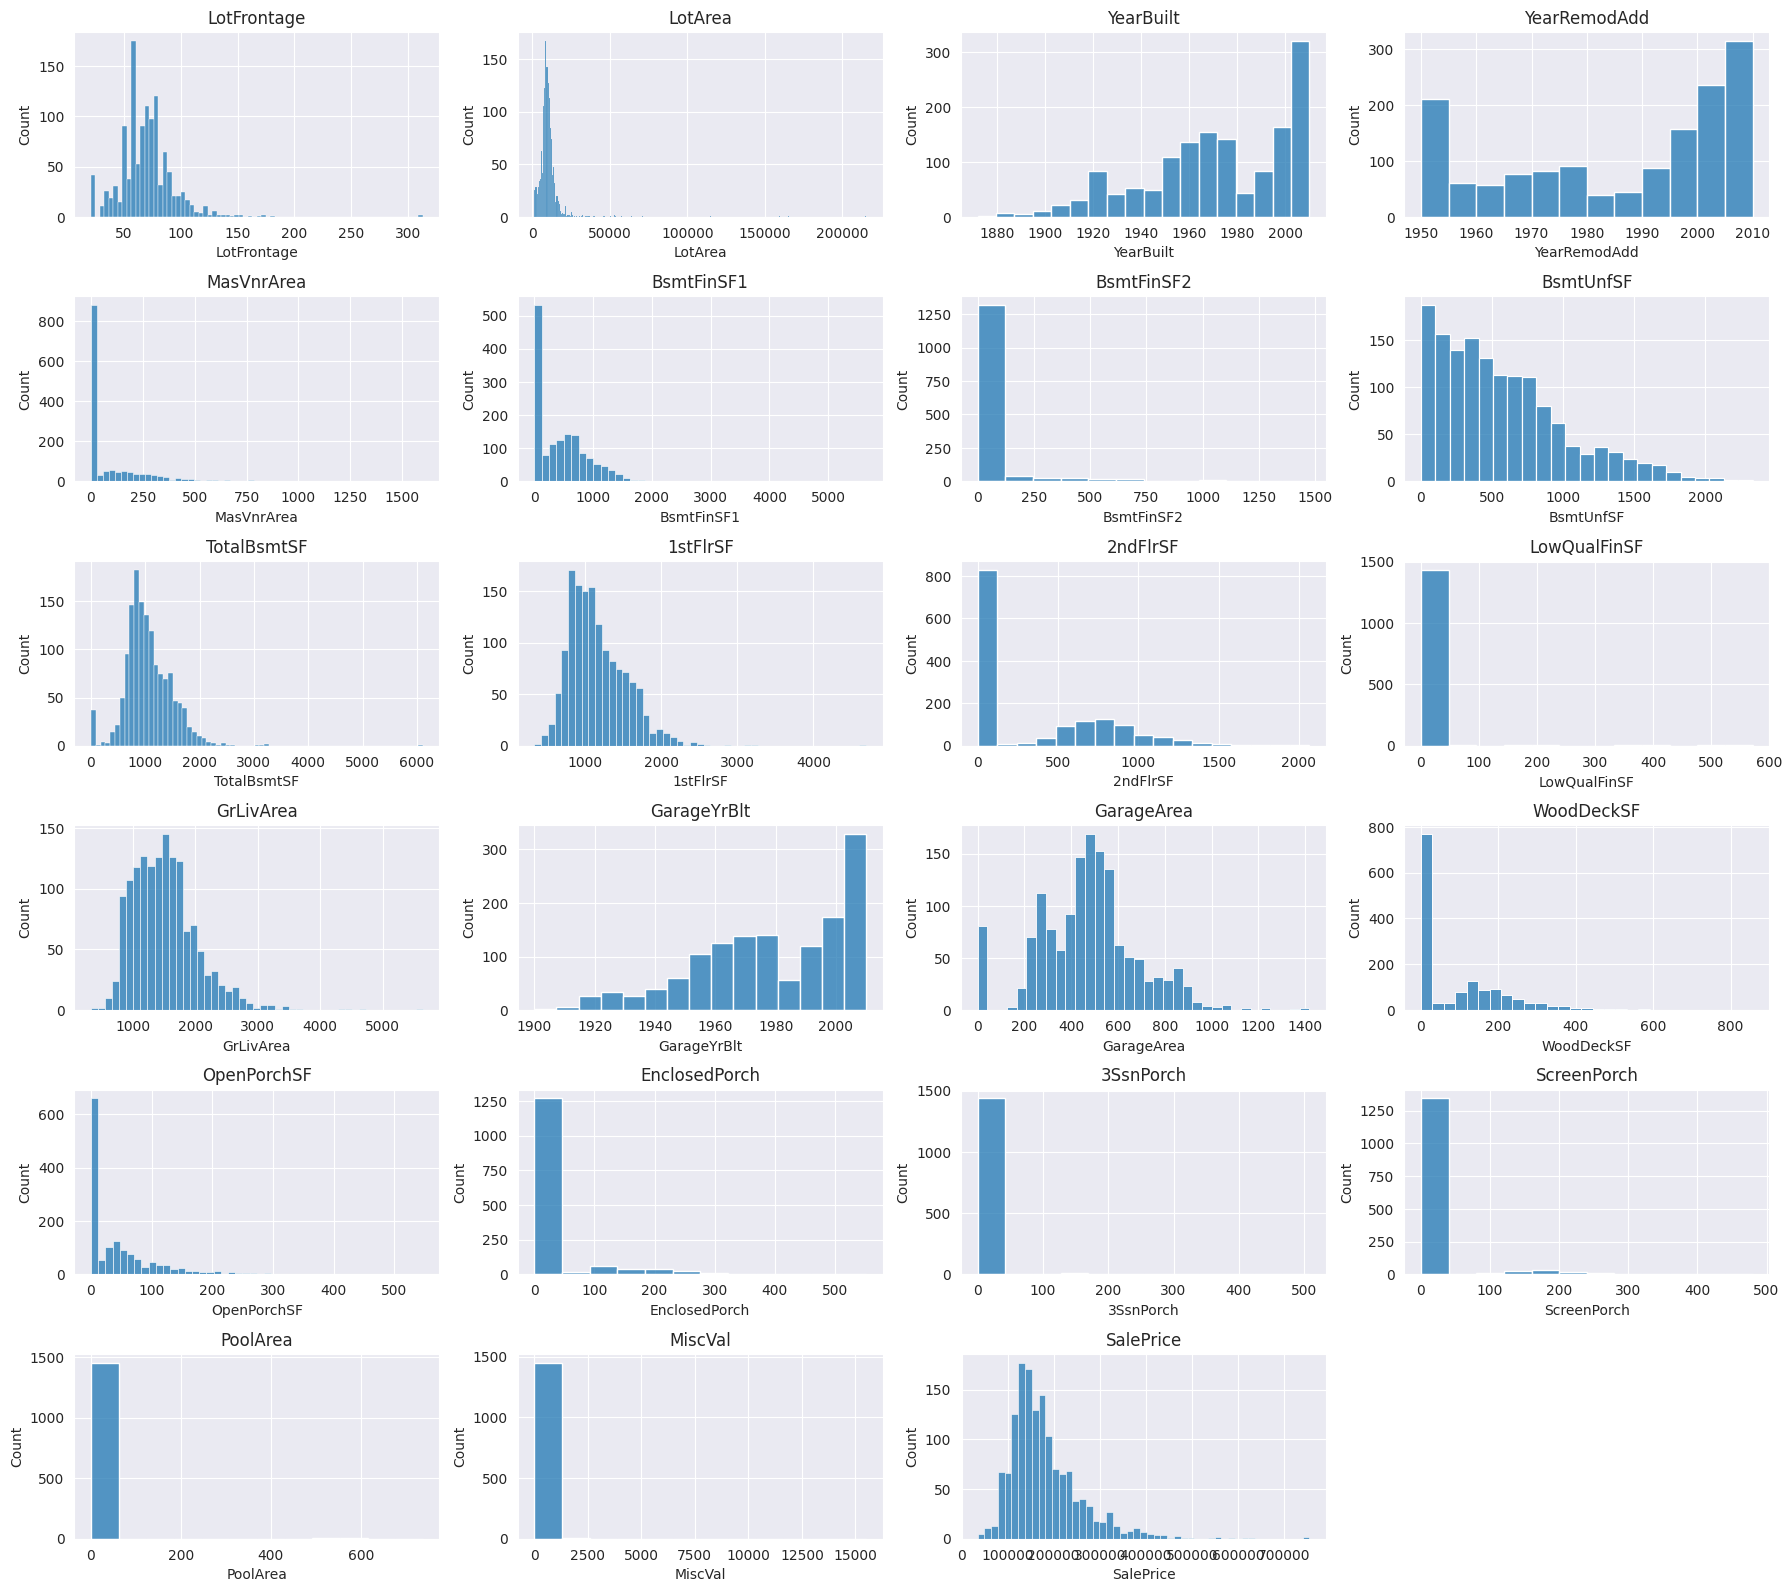

In [ ]:
fig = plt.figure(figsize=(18, 16))

for index, col in enumerate(cont_num_var):
  plt.subplot(6, 4, index+1)
  sns.histplot(numeric_train[col].dropna(), kde=False)
  plt.title(col)

plt.tight_layout(pad=1.0)
plt.show()

```
필자 曰

BsmtFinSF2, LowQualFinSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal
이 7개의 변수는 거의 1가지 값(0)으로만 분포.
-> 집 값 예측에 도움이 되지 않으니 drop
```

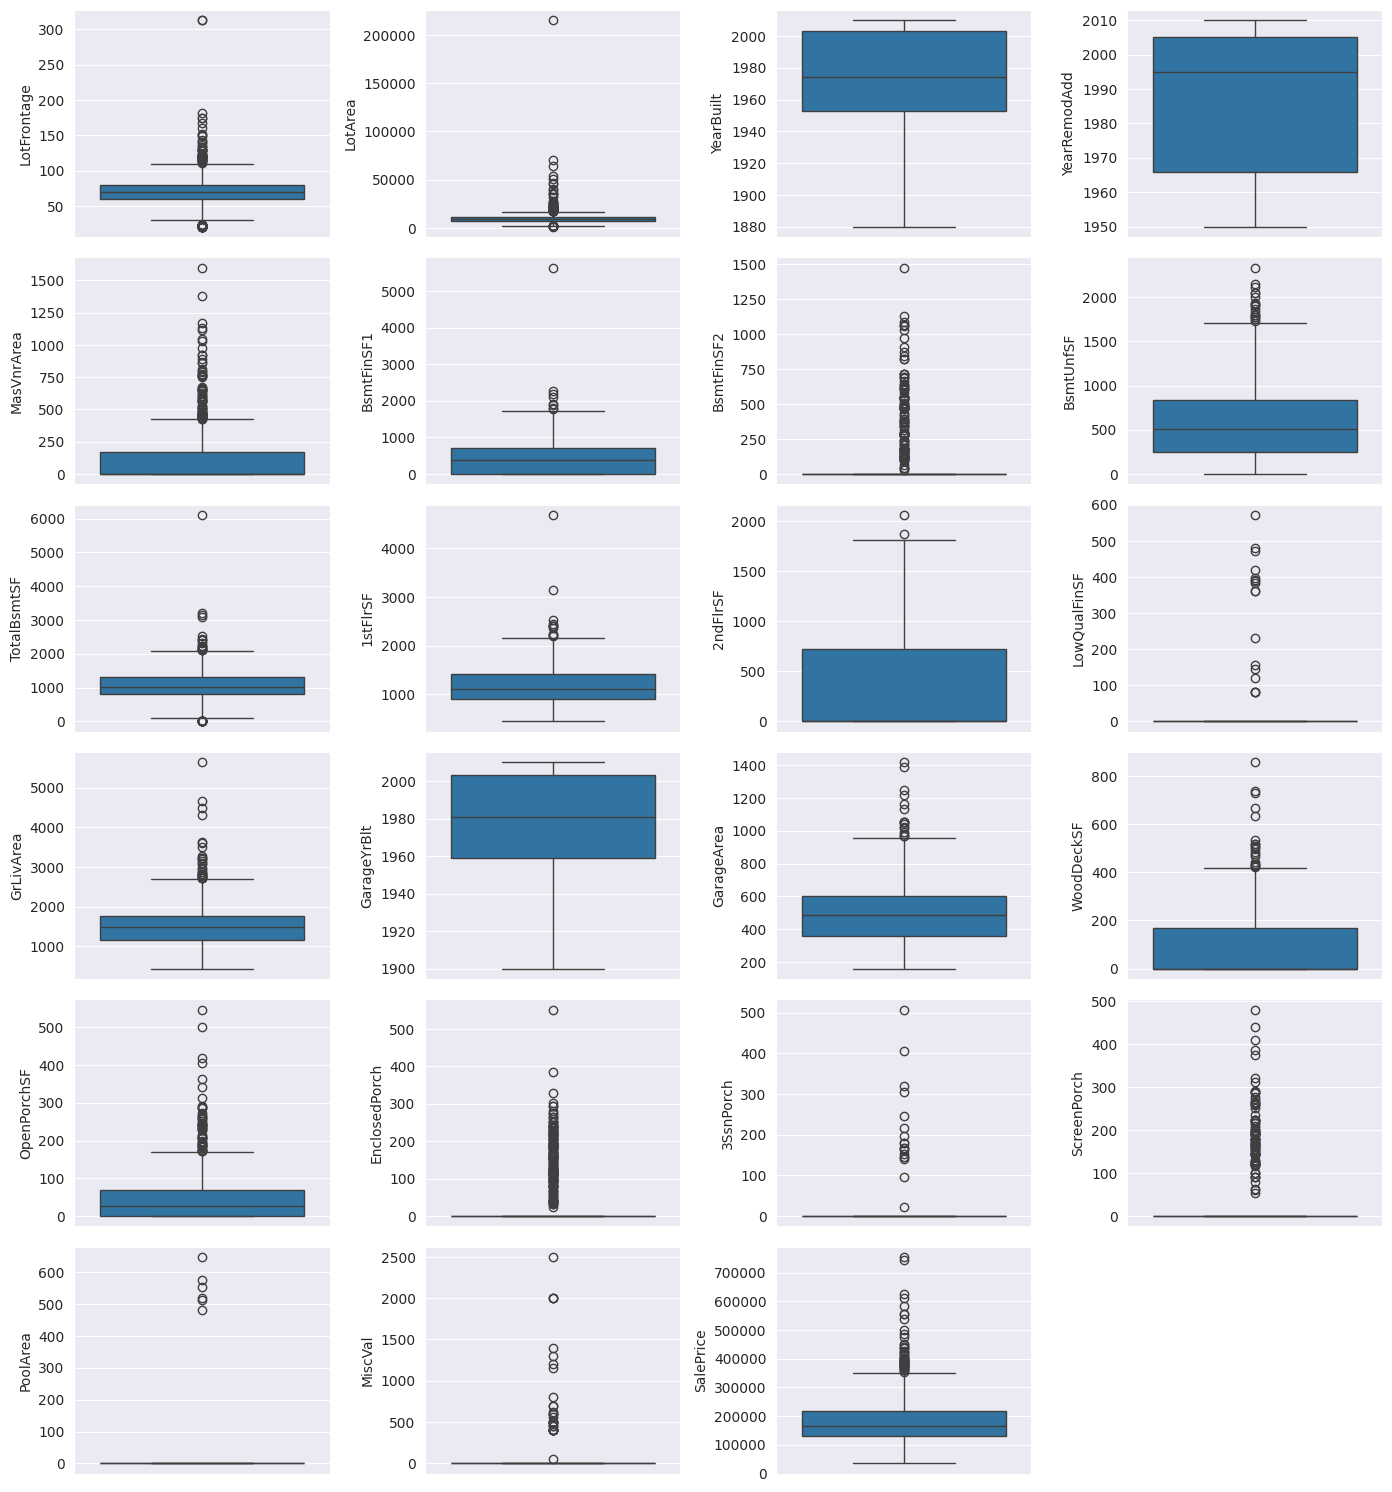

In [ ]:
fig = plt.figure(figsize=(14, 15))
for index, col in enumerate(cont_num_var):
  plt.subplot(6, 4, index+1)
  sns.boxplot(y=col, data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

### countplot으로 이산형 변수 시각화

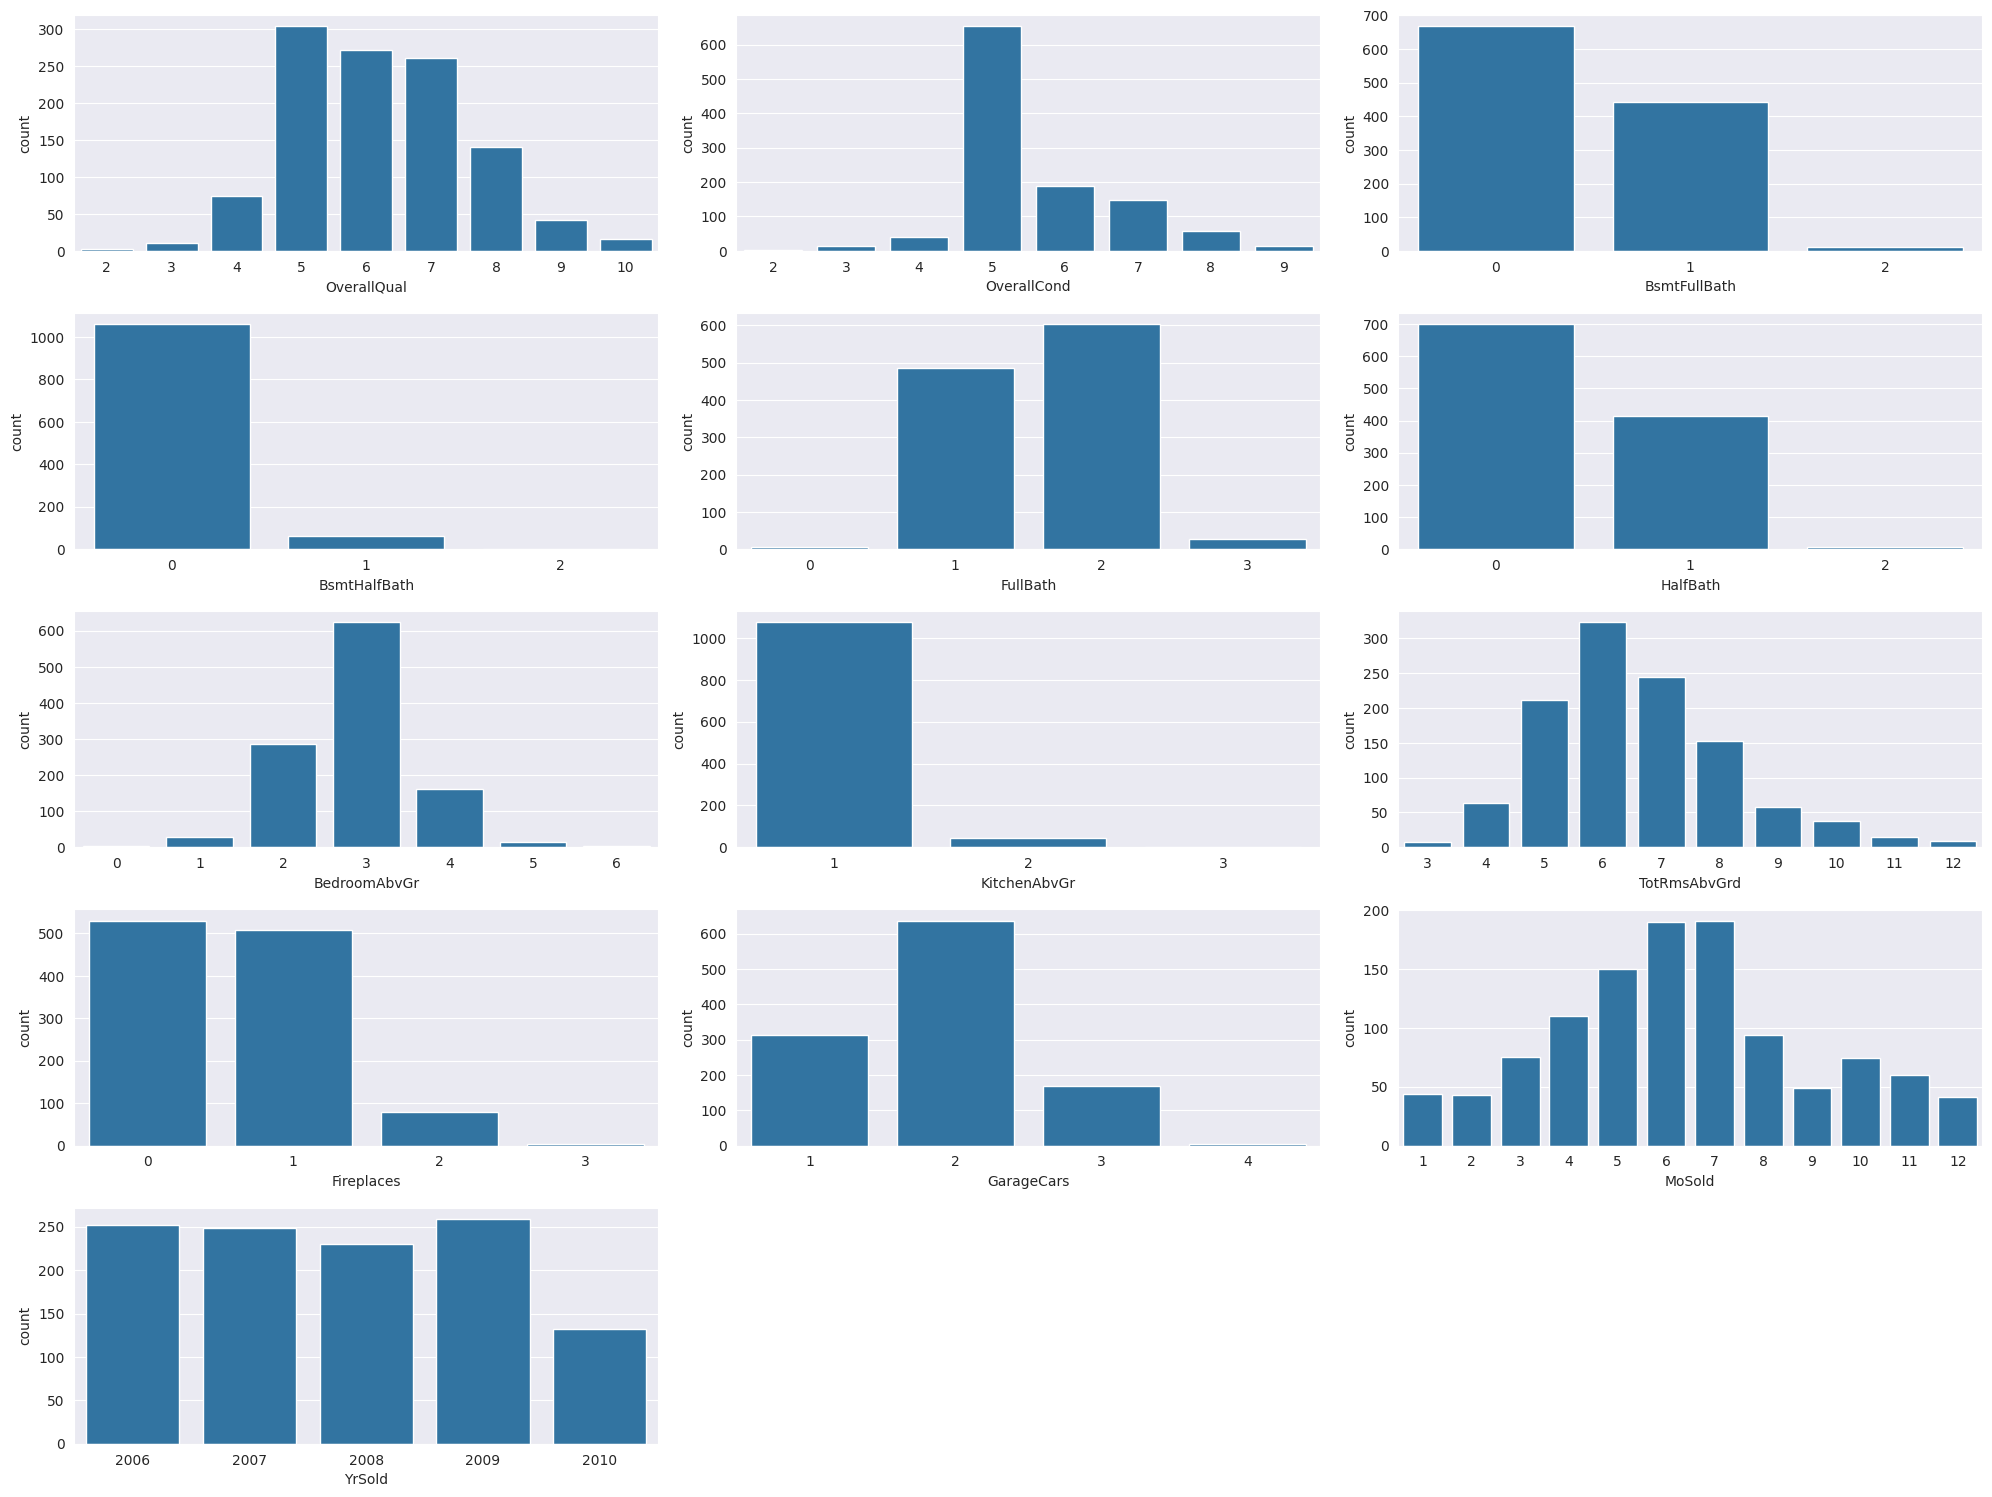

In [ ]:
fig = plt.figure(figsize=(20, 15))
for index, col in enumerate(disc_num_var):
  plt.subplot(5, 3, index+1)
  sns.countplot(x=col, data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

### countplot으로 범주형 변수 시각화

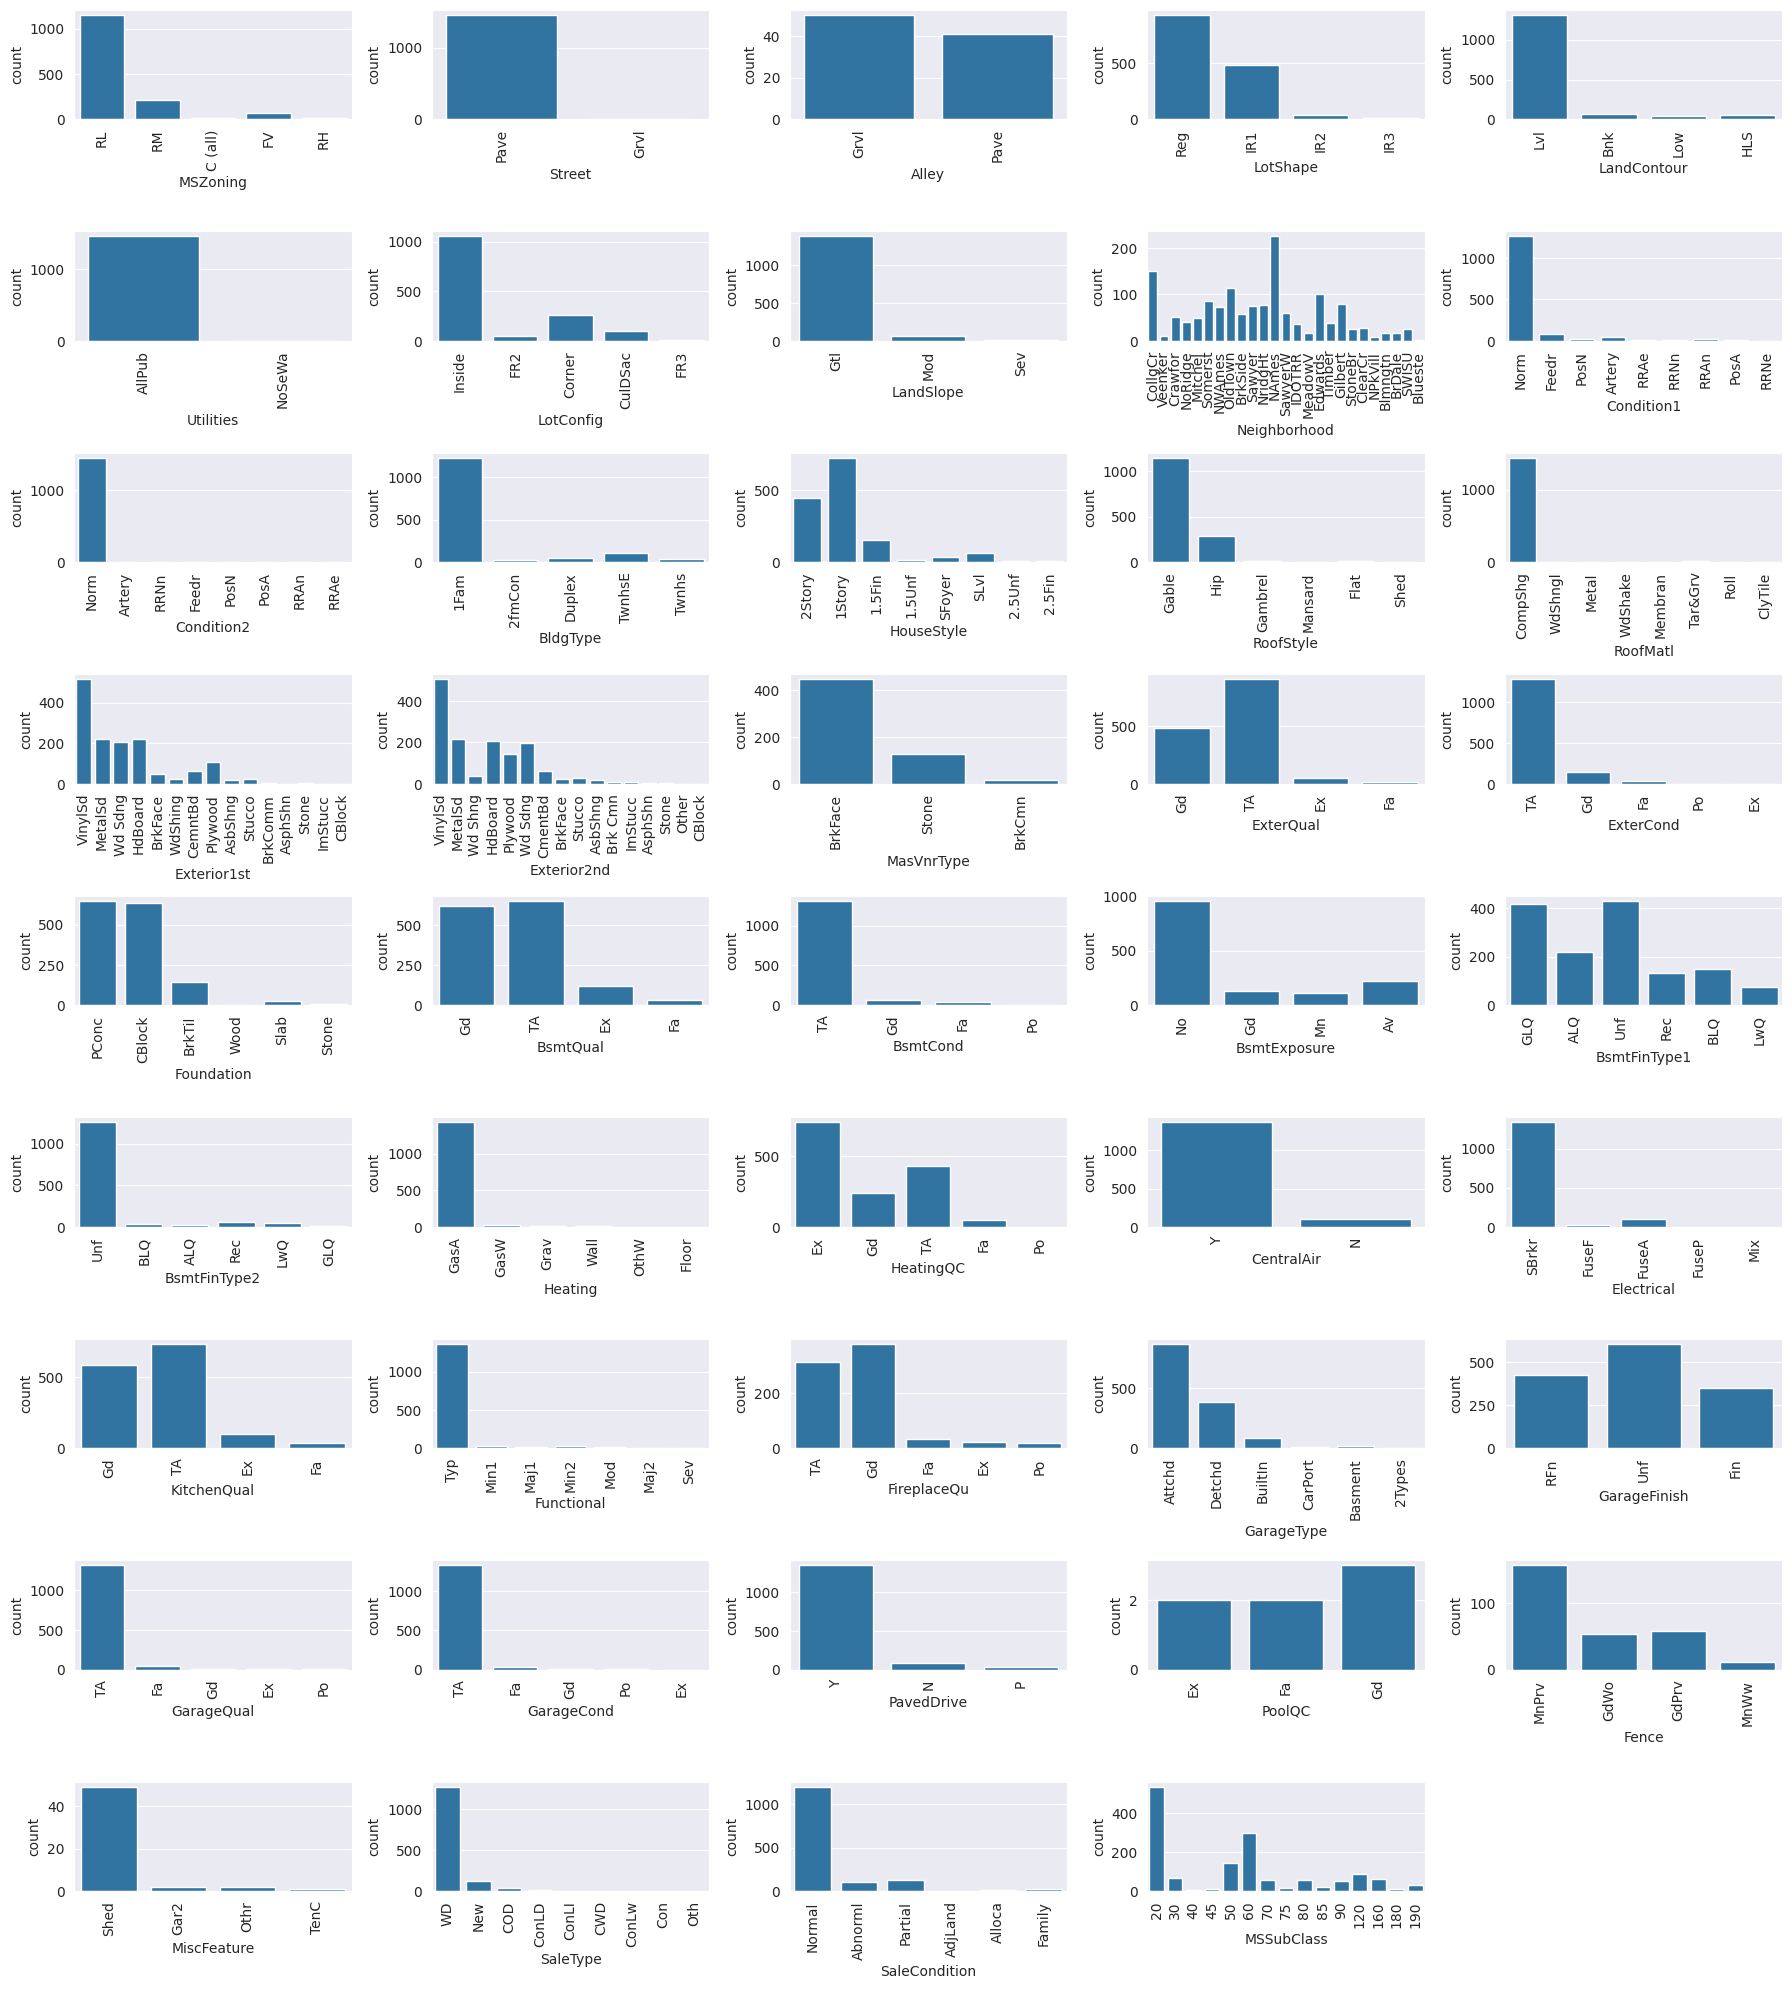

In [ ]:
fig = plt.figure(figsize=(18, 20))
for index, col in enumerate(cat_train.columns):
  plt.subplot(9, 5, index+1)
  sns.countplot(x=cat_train.iloc[:, index], data=cat_train.dropna())
  plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

```
필자 曰
Utilities, Condition2 와 같은 변수도 값이 1개여서 예측에 도움이 안됨
-> drop 해서 분석할것임
```

## 1.2 Bi-Variate Analysis

**Correlation Matrix**

- 2개의 연속형 변수 간 선형 관계를 볼 수 있음
- 다중공산성 확인 가능

### 연속형 변수의 상관행렬
높은 상관관계를 같는 변수를 보기 위해
`mask=correlation<0.8` 을 이용해 상관관계가 0.8 이상인 부분만 시각화

<Axes: >

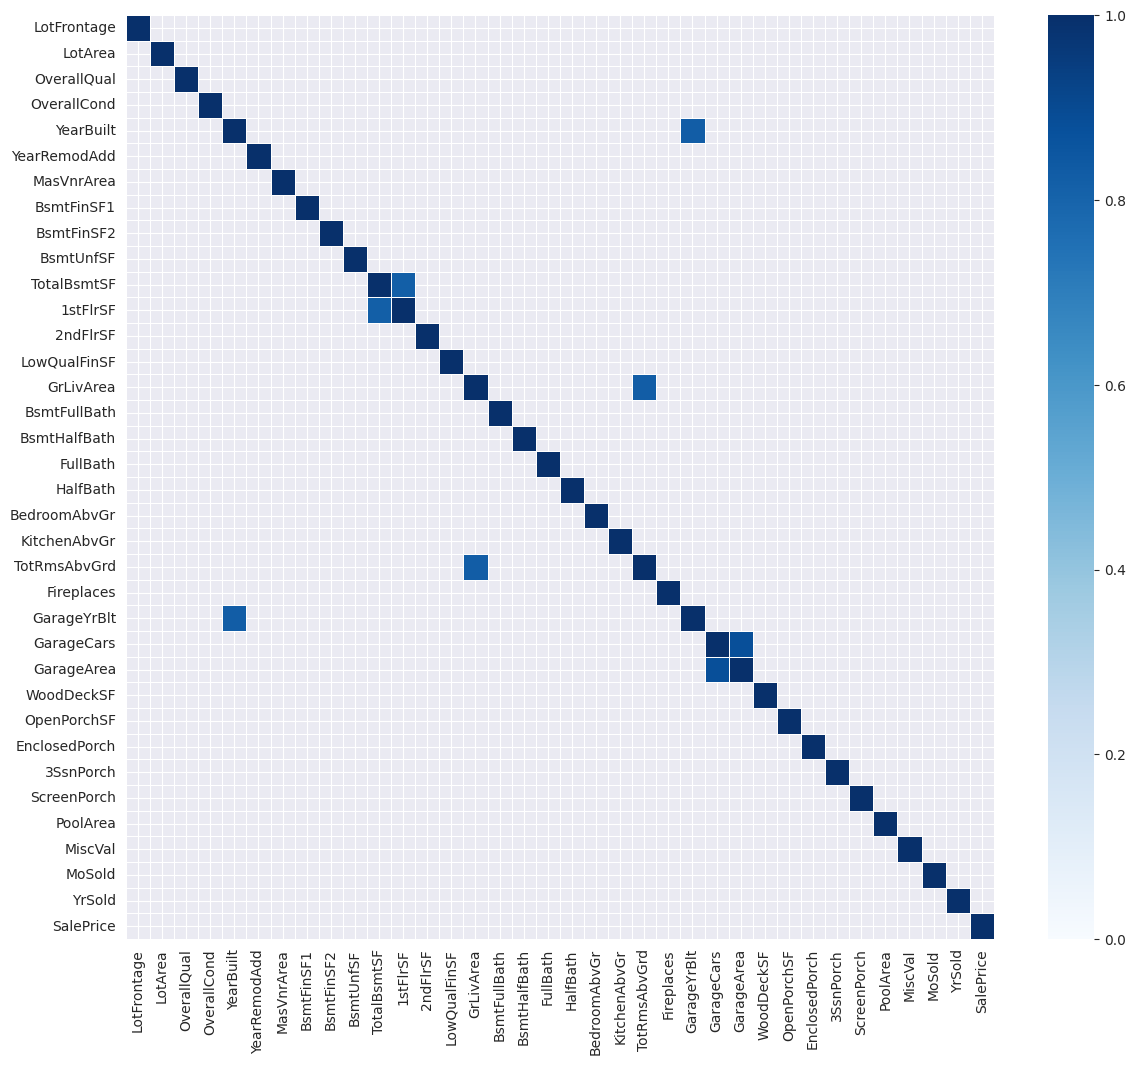

In [ ]:
plt.figure(figsize=(14, 12))
correlation = numeric_train.corr()
sns.heatmap(correlation, mask=correlation<0.8, linewidth=0.5, vmin=0, vmax=1.0, cmap='Blues')

```
필자 曰

GarageYrBlt & YearBuilt
TotRmsAbvGrd & GrLivArea
1stFlrSF & TotalBsmtSF
GarageArea & GarageCars
다중공산성 위험이 있는 변수들
```

### SalePrice(타겟변수)와 연속형 변수 간 상관관계

In [ ]:
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


```
필자 曰

SalePrice와 연속형 변수간 상관관계를 보았을 때,
OverallQual, GrLivArea가 가장 강한 선형 관계를 보였다.
-> 이 2개의 변수가 housing price를 예측하는데 중요한 요인이 될 것임
```

### Scatterplot으로 수치형 변수 시각화

수치로 표현이 되지는 않지만, 상관행렬이 놓친 잠재적 선형 관계 발견 가능

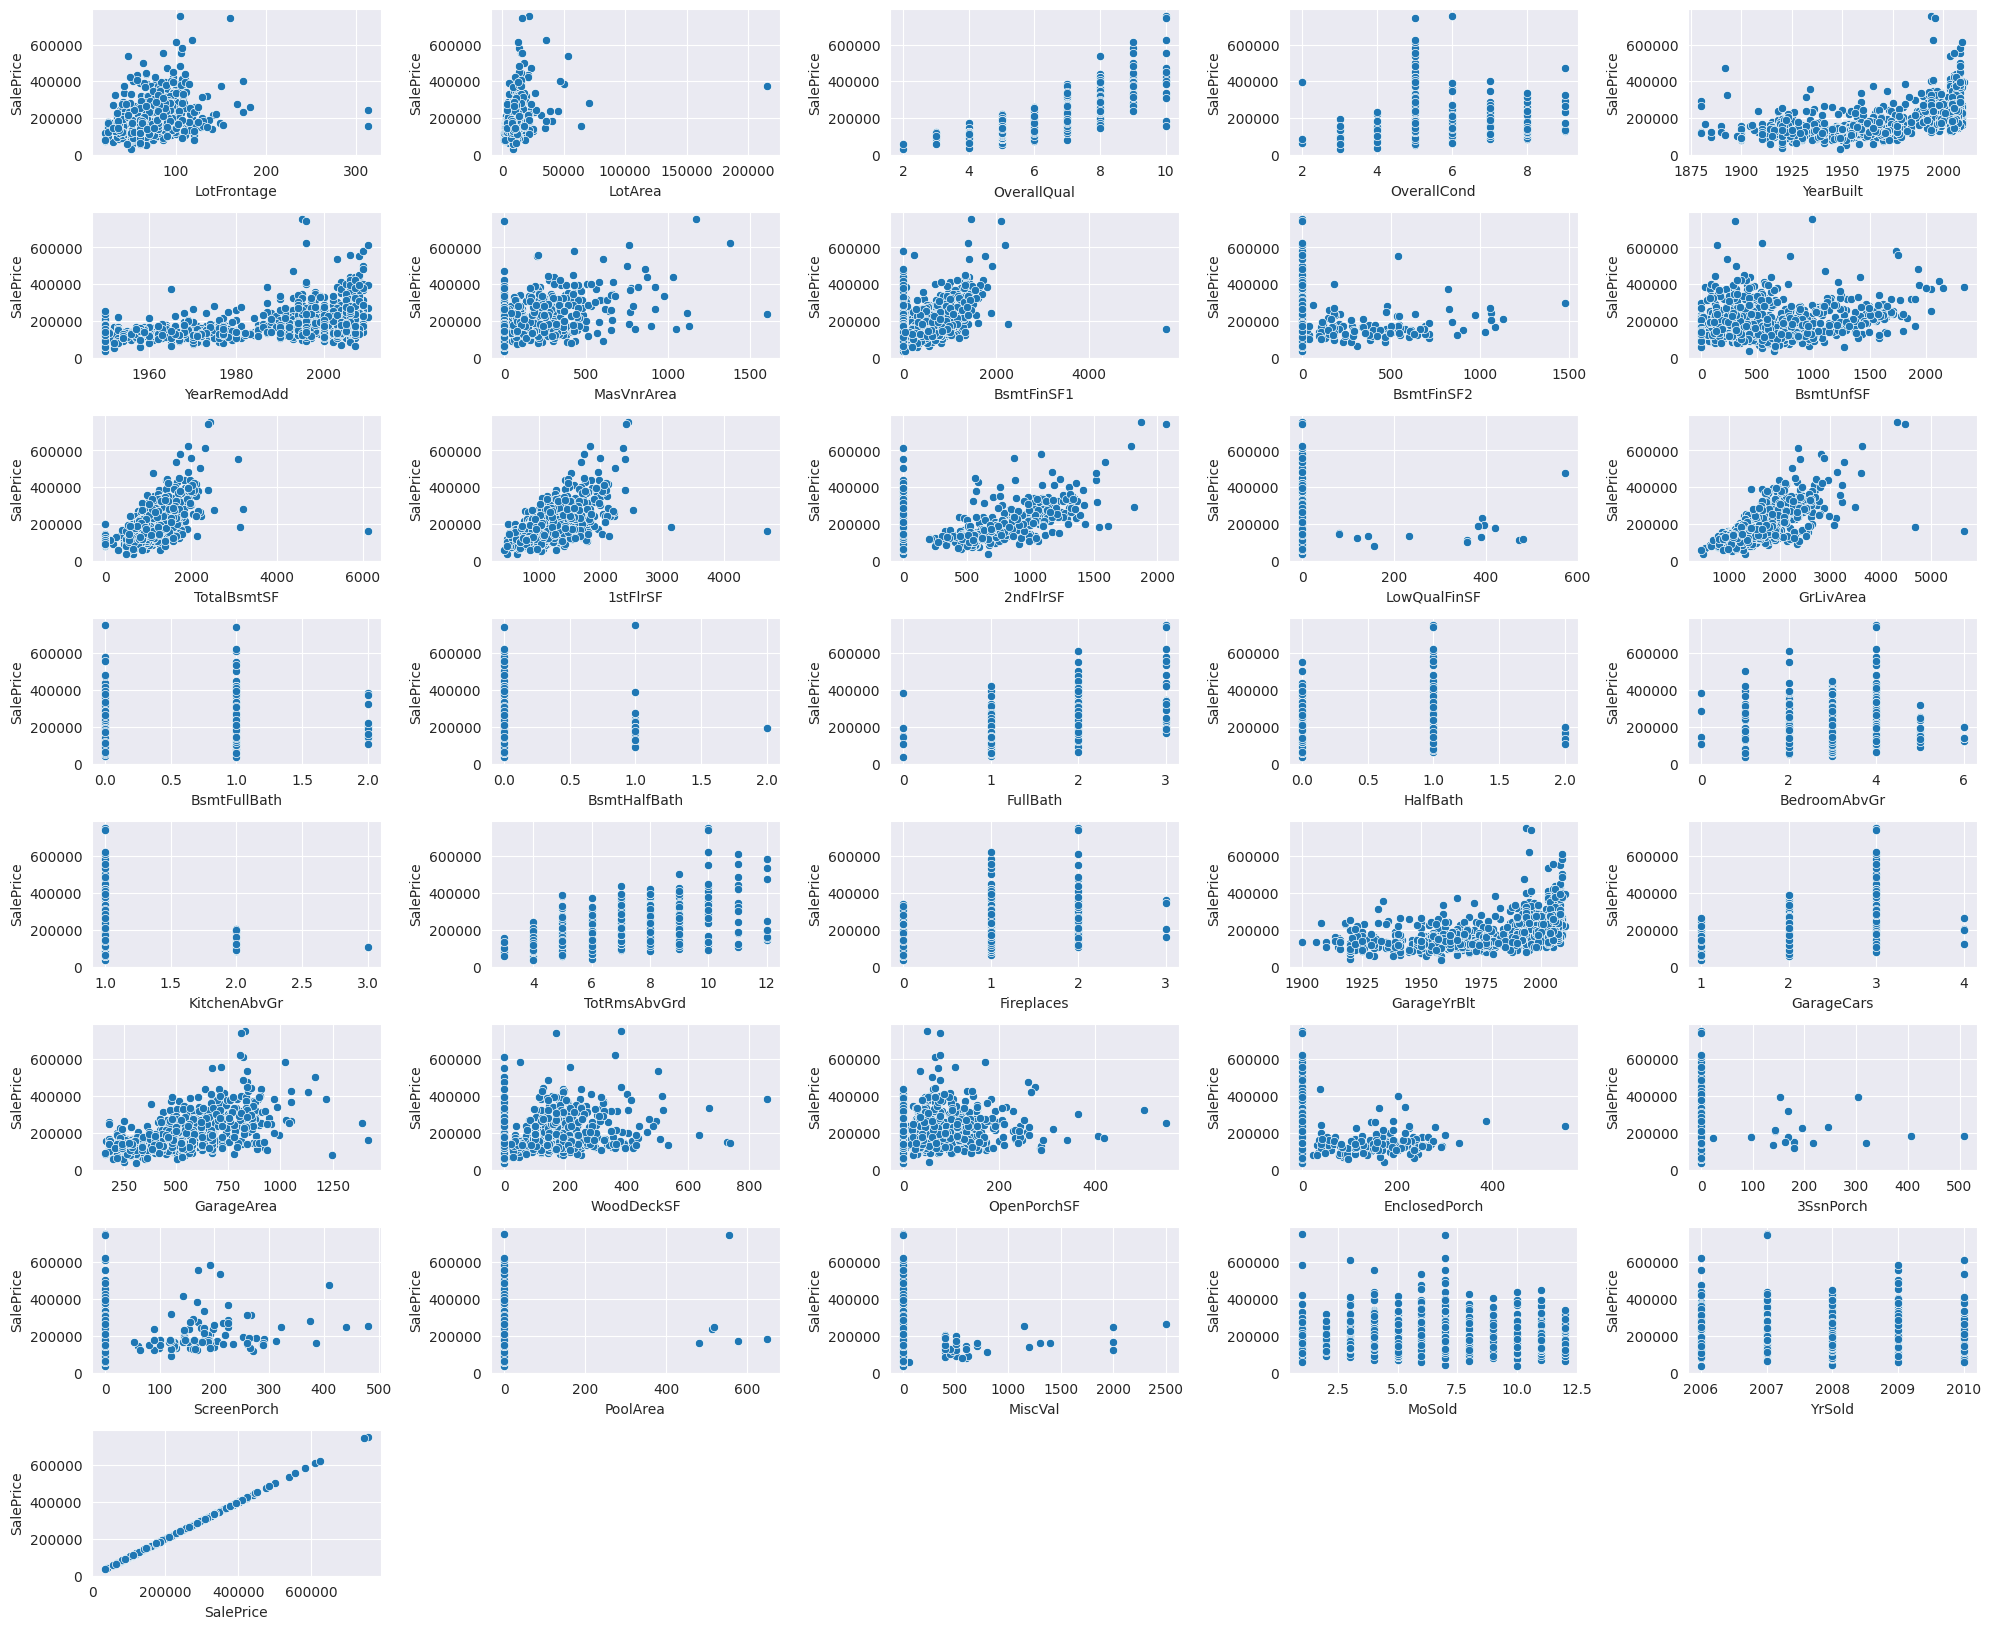

In [ ]:
fig = plt.figure(figsize=(20, 20))
for index in range(len(numeric_train.columns)):
  plt.subplot(10, 5, index+1)
  sns.scatterplot(x=numeric_train.iloc[:, index], y='SalePrice', data=numeric_train.dropna())
fig.tight_layout(pad=1.0)

# 2 Data Processing

In [ ]:
X = pd.concat([train.drop("SalePrice", axis=1), test], axis=0)
y= train[['SalePrice']]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

# 2.1 Removing Redundant Features

### 다중공산성 위험이 있는 변수 제거

In [ ]:
X.drop(['GarageYrBlt','TotRmsAbvGrd','1stFlrSF','GarageCars'], axis=1, inplace=True)

### 결측값 많은 변수 제거
```
결측값이 너무 많은 변수는 대체하지 않고 없애는구나..
```

<Axes: title={'center': 'Number of missing rows'}, xlabel='features', ylabel='sum'>

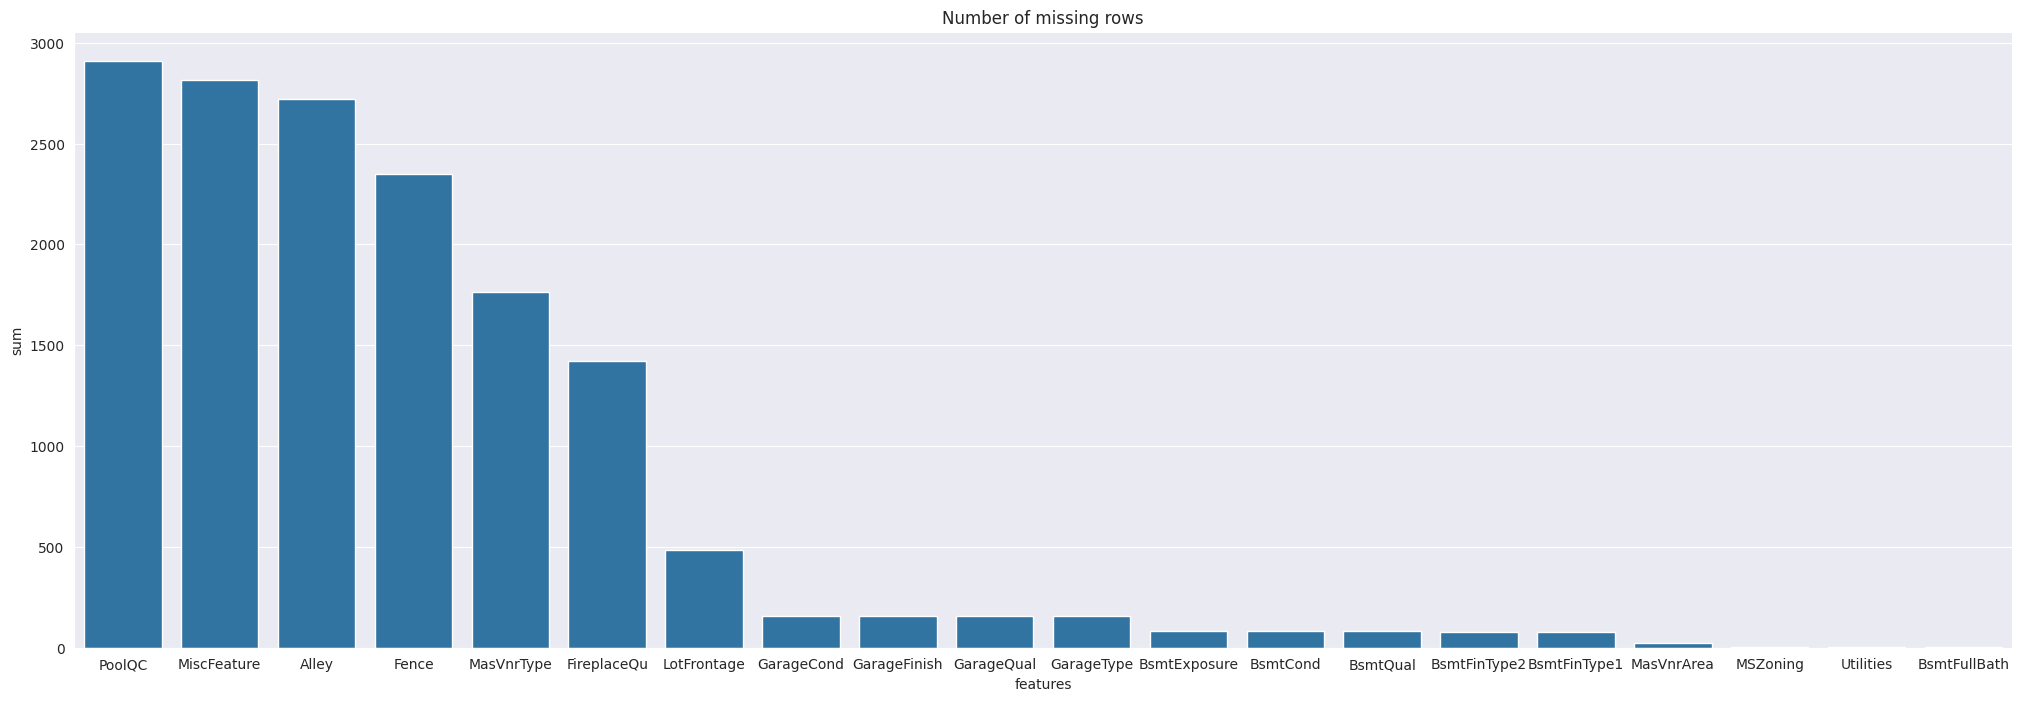

In [ ]:
plt.figure(figsize=(25, 8))
plt.title('Number of missing rows')
missing_count = pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(20).reset_index()
missing_count.columns = ['features', 'sum']
sns.barplot(x='features', y='sum', data=missing_count)

In [ ]:
X.drop(['PoolQC', 'MiscFeature', 'Alley'], axis=1, inplace=True)

### 상관관계 및 회귀선 시각화

- if 상관관계 有 -> 회귀선 우상향/우하향
- if 상관관계 無 -> 회귀선 x축에 평행

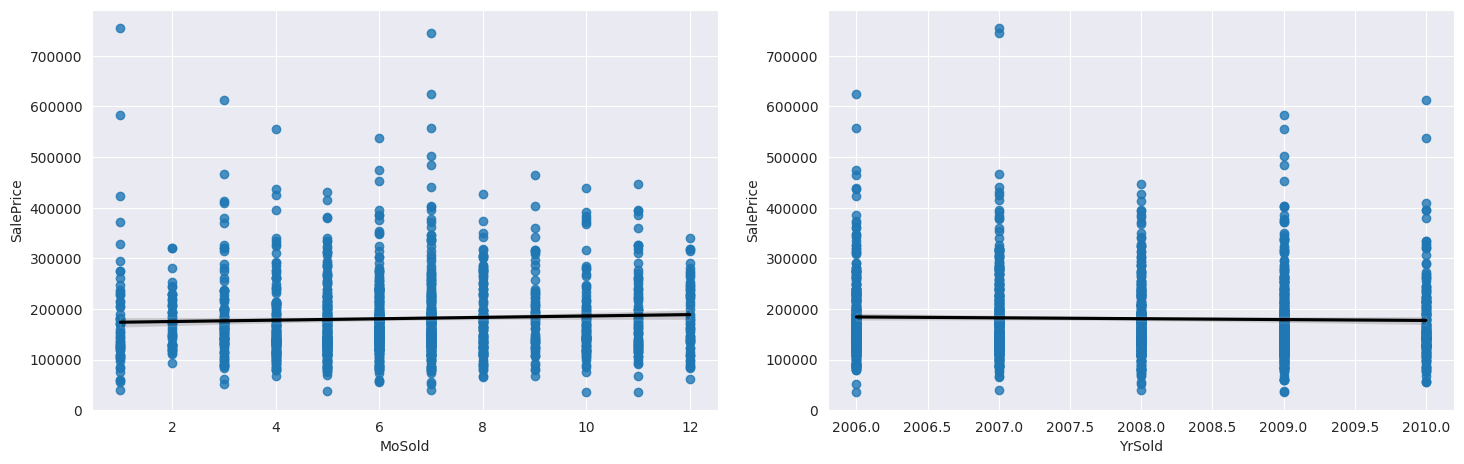

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(x=numeric_train['MoSold'], y='SalePrice', data=numeric_train, ax=axes[0], line_kws={'color':'black'})
sns.regplot(x=numeric_train['YrSold'], y='SalePrice', data=numeric_train, ax=axes[1], line_kws={'color':'black'})
fig.tight_layout(pad=2.0)

In [ ]:
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False).tail(10)

X.drop(['MoSold', 'YrSold'], axis=1, inplace=True)

### 대부분 1개의 값으로만 분포하는 변수 제거

변수 데이터의 96%가 같은 값이라면, 추출할 정보가 별로 없기 때문에 버릴 것이다.

In [ ]:
cat_col = X.select_dtypes(include=['object']).columns
overfit_cat = []
for i in cat_col:
  counts = X[i].value_counts()
  zeros = counts.iloc[0]
  if zeros / len(X) * 100 > 96:
    overfit_cat.append(i)

overfit_cat = list(overfit_cat)
X = X.drop(overfit_cat, axis=1)

첫번째 행의 값으로 보고 있는데, 예외적으로 첫번째 행의 값이 나머지 4%에 해당할 수 있기 때문에 `.value_counts().max()` 를 이용하는 것이 더 안전해보인다

In [ ]:
num_col = X.select_dtypes(exclude=['object']).drop(['MSSubClass'], axis=1).columns
overfit_num = []
for i in num_col:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 96:
        overfit_num.append(i)

overfit_num = list(overfit_num)
X = X.drop(overfit_num, axis=1)

In [ ]:
print(f"Categorical Features with >96% of the same value: {overfit_cat}")
print(f"Numerical Features with >96% of the same value: {overfit_num}")

Categorical Features with >96% of the same value: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']
Numerical Features with >96% of the same value: ['LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']


## 2.2 Dealing with Outliers

**boxplot 시각화** 를 통해
- LotFrontage
- LotArea
- BsmtFinSF1
- TotalBsmtSF
- GrLivArea

이 5개의 변수가 이상치를 가지고 있는 것으로 드러났다. 이상치를 제거해보자.

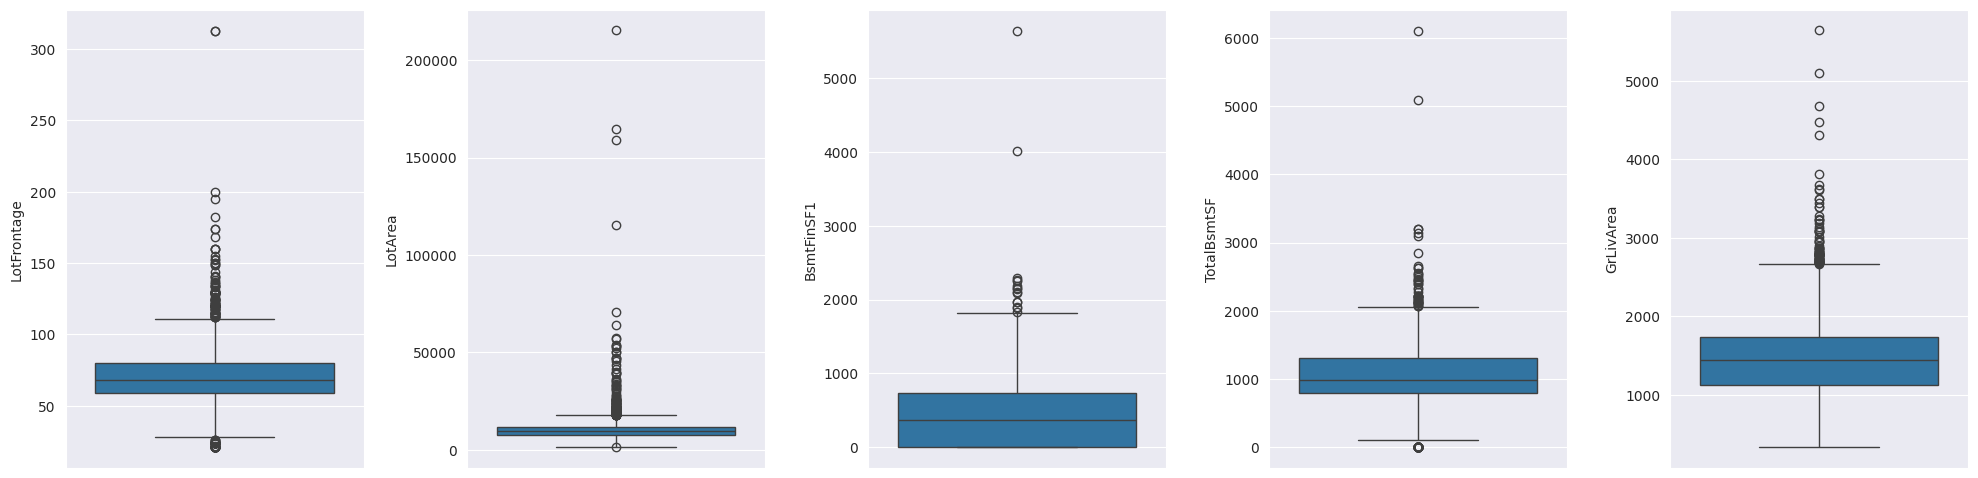

In [ ]:
out_col = ['LotFrontage','LotArea','BsmtFinSF1','TotalBsmtSF','GrLivArea']
fig = plt.figure(figsize=(20,5))
for index,col in enumerate(out_col):
    plt.subplot(1,5,index+1)
    sns.boxplot(y=col, data=X)
fig.tight_layout(pad=1.5)

In [ ]:
train = train.drop(train[train['LotFrontage'] > 200].index, axis=0)
train = train.drop(train[train['LotArea'] > 100000].index)
train = train.drop(train[train['BsmtFinSF1'] > 4000].index)
train = train.drop(train[train['TotalBsmtSF'] > 5000].index)
train = train.drop(train[train['GrLivArea'] > 4000].index)

In [ ]:
X.shape

(2919, 61)

## 2.3 Filling Missing Values

In [ ]:
pd.DataFrame(X.isnull().sum(), columns=['sum']).sort_values(by=['sum'], ascending=False).head(15)

,sum
Fence,2348
MasVnrType,1766
FireplaceQu,1420
LotFrontage,486
GarageCond,159
GarageQual,159
GarageFinish,159
GarageType,157
BsmtExposure,82
BsmtCond,82


### 범주형 변수 결측값 처리

결측값 자체를 'NA'로 채워줌(이 또한 결측값 처리 방식 중 하나)

지역별 특성이 강한 변수끼리는 묶어서 최빈값을 넣어줌

In [ ]:
cat = ['GarageType','GarageFinish','BsmtFinType2','BsmtExposure','BsmtFinType1',
       'GarageCond','GarageQual','BsmtCond','BsmtQual','FireplaceQu','Fence',"KitchenQual",
       "HeatingQC",'ExterQual','ExterCond'] #가독성을 위해 한 번 더 써준듯?

X[cat] = X[cat].fillna("NA")

In [ ]:
cols = ["MasVnrType", "MSZoning", "Exterior1st", "Exterior2nd", "SaleType", "Electrical", "Functional"]

def fill_mode(x):
    m = x.mode()
    return x.fillna(m.iloc[0]) if not m.empty else x

X[cols] = X.groupby("Neighborhood")[cols].transform(fill_mode)

<ipython-input-52-aba5c041a551>:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return x.fillna(m.iloc[0]) if not m.empty else x


### 수치형 변수 결측값 처리

바로 평균으로 채우지 않고 마찬가지로 지역별로 묶어 평균으로 채움

In [ ]:
print(f"Mean of LotFrontage: {X['LotFrontage'].mean()}")
print(f"Median of GarageArea: {X['GarageArea'].mean()}")

Mean of LotFrontage: 69.30579531442663
Median of GarageArea: 472.8745716244003


<Axes: xlabel='Neighborhood', ylabel='GarageArea_mean'>

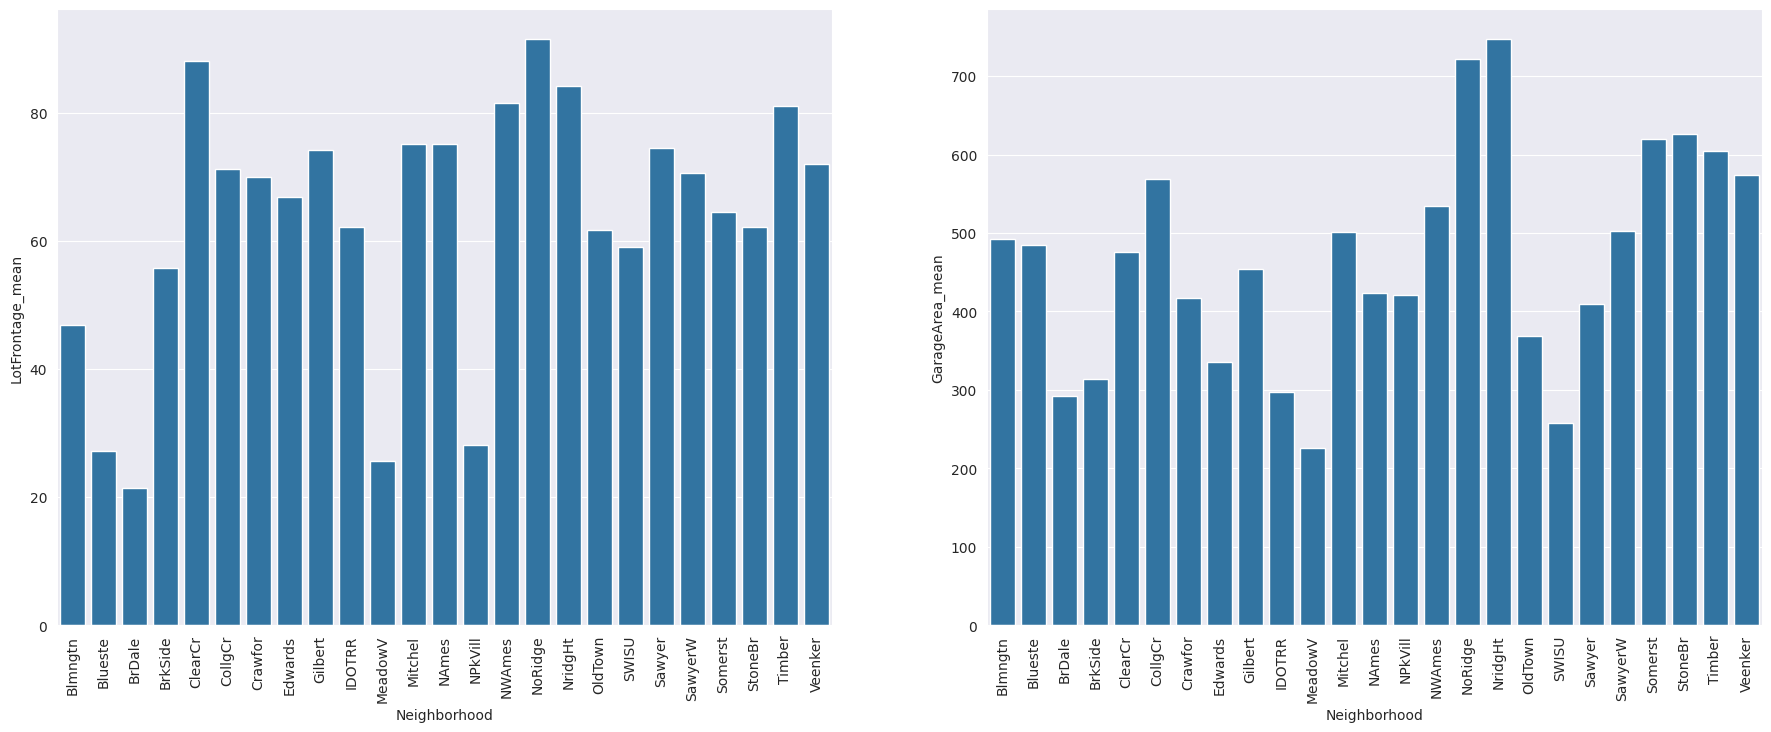

In [ ]:
neigh_lot = X.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage_mean')
neigh_garage = X.groupby('Neighborhood')['GarageArea'].mean().reset_index(name='GarageArea_mean')

fig, axes = plt.subplots(1,2,figsize=(22,8))
axes[0].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='LotFrontage_mean', data=neigh_lot, ax=axes[0])
axes[1].tick_params(axis='x', rotation=90)
sns.barplot(x='Neighborhood', y='GarageArea_mean', data=neigh_garage, ax=axes[1])

In [ ]:
X['LotFrontage'] = X.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))
X['GarageArea'] = X.groupby('Neighborhood')['GarageArea'].transform(lambda x: x.fillna(x.mean()))
X['MSZoning'] = X.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

cont = ["BsmtHalfBath", "BsmtFullBath", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "MasVnrArea"]
X[cont] = X[cont].fillna(X[cont].mean())

In [ ]:
X['MSSubClass'] = X['MSSubClass'].apply(str) #더 빨리 해도 되었을 것 같음

### 변수 mapping

In [ ]:
ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

In [ ]:
ord_col = ['ExterQual','ExterCond','BsmtQual', 'BsmtCond','HeatingQC','KitchenQual','GarageQual','GarageCond', 'FireplaceQu']
for col in ord_col:
    X[col] = X[col].map(ordinal_map)

fin_col = ['BsmtFinType1','BsmtFinType2']
for col in fin_col:
    X[col] = X[col].map(fintype_map)

X['BsmtExposure'] = X['BsmtExposure'].map(expose_map)
X['Fence'] = X['Fence'].map(fence_map)

# 3 Feature Engineering


### 도메인 지식을 활용한 변수 엔지니어링

필자의 도메인 지식을 활용하여 새 변수를 만들 것임
- TotalLot = LotFrontage + LotArea
- TotalSF = TotalBsmtSF + 2ndFlrSF
- TotalBath = FullBath + HalfBath
- TotalPorch = OpenPorchSF + EnclosedPorch + ScreenPorch
- TotalBsmtFin = BsmtFinSF1 + BsmtFinSF2

In [ ]:
X['TotalLot'] = X['LotFrontage'] + X['LotArea']
X['TotalBsmtFin'] = X['BsmtFinSF1'] + X['BsmtFinSF2']
X['TotalSF'] = X['TotalBsmtSF'] + X['2ndFlrSF']
X['TotalBath'] = X['FullBath'] + X['HalfBath']
X['TotalPorch'] = X['OpenPorchSF'] + X['EnclosedPorch'] + X['ScreenPorch']

### 존재여부가 중요한 수치형 변수는 binary 변수로 변경

presence(1) absence(0)

In [ ]:
colum = ['MasVnrArea','TotalBsmtFin','TotalBsmtSF','2ndFlrSF','WoodDeckSF','TotalPorch']

for col in colum:
    col_name = col+'_bin' #binary 뜻하는 새 변수 만듦
    X[col_name] = X[col].apply(lambda x: 1 if x > 0 else 0)

### categorical -> numerical

머신러닝은 수치형 데이터만 학습하기 때문에 **get_dummies(X)**를 이용해 머신러닝에 필요한 변수 type을 바꿔주겠다

In [ ]:
X = pd.get_dummies(X)

### SalePrice Distribution

타겟 변수가 치우쳐진 경우 머신러닝 모델에 영향을 미치기 때문에 **로그 변환** 을 통해 해결

- 머신러닝 모델, 특히 선형회귀의 경우 **정규분포에 가까운 타겟**을 더 잘 예측함

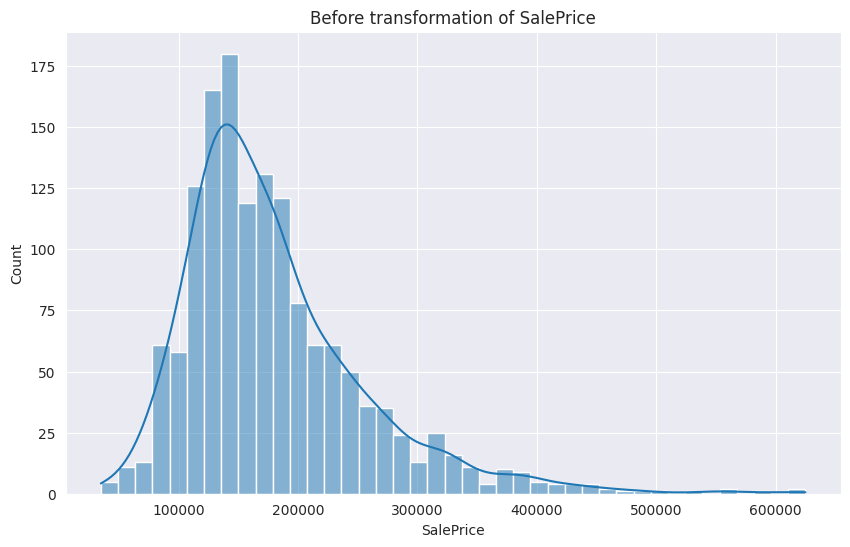

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Before transformation of SalePrice")
sns.histplot(train['SalePrice'], kde=True)
plt.show()

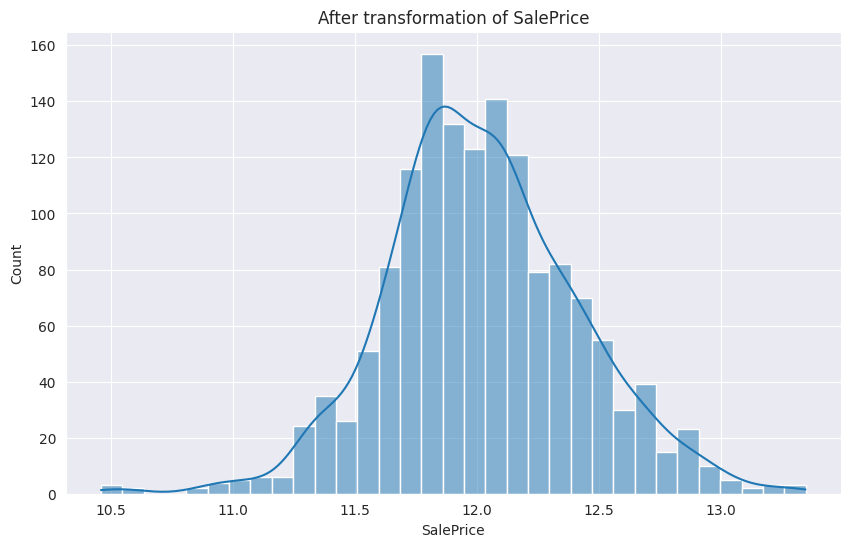

In [ ]:
plt.figure(figsize=(10,6))
plt.title("After transformation of SalePrice")
sns.histplot(np.log(train['SalePrice']), kde=True)
plt.show()

In [ ]:
y["SalePrice"] = np.log(y['SalePrice'])

# 4 Modeling

### train+test -> train / test
data leakage 막으려고

In [ ]:
x = X.loc[train.index]
y = y.loc[train.index]
test = X.loc[test.index]

## 4.1 Scaling of Data

### RobustScaler
- 각 컬럼을 중앙값 기준으로 정규화하고, IQR로 나누어 스케일링
- X_scaled = (X-median)/IQR
- 장점
  - 이상치 영향 적음
  - 정규분포 아니어도 잘 작동함
  - 스케일이 다른 변수들 정돈
  - 다른 스케일러 대비 안정적(`StandardScaler`보다 극단값에 덜 민감




### Scaler 별 비교
| 항목 | `StandardScaler` | `MinMaxScaler` | `RobustScaler` |
|------|------------------|----------------|----------------|
| 중심 기준 | 평균 (`mean`) | 최솟값 (`min`) | **중앙값 (`median`)** |
| 분산 기준 | 표준편차 (`std`) | 최대-최소 (`max - min`) | **IQR (3사분위 - 1사분위)** |
| 이상치에 민감한가? | ⚠️ 민감 | ⚠️ 매우 민감 | ✔️ **둔감 (강점)** |
| 스케일 범위 | 평균 0, 분산 1 | [0, 1] | 대략 -1~1 사이 (고정 X) |
| 데이터 분포 가정 | 거의 정규분포 가정 | 없음 | 없음 |
| 사용 추천 상황 | 정규분포 + 이상치 없음 | 값 범위 고정 필요할 때 | **이상치 많을 때** ✅ |
| 주요 공식 | (x - mean) / std | (x - min) / (max - min) | (x - median) / IQR |

In [ ]:
from sklearn.preprocessing import RobustScaler

cols = x.select_dtypes(np.number).columns
transformer = RobustScaler().fit(x[cols])
x[cols] = transformer.transform(x[cols])
test[cols] = transformer.transform(test[cols])

## 4.2 Ensemble Algorithms
- 여러 개의 머신러닝 모델을 하나의 예측모델로 결합하는 방식
- **목적** : 과적합 방지와 정확도 향상
- 주요 방식 : **Bagging, Boosting, Stacking**


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=2020)

### Boosting
- 여러 개의 **약한 학습기(weak learner)**를 **순차적으로 학습**시켜 성능을 점점 높이는 앙상블 방식
- 이전 모델이 **틀린 데이터에 가중치를 더 부여**하여 다음 모델이 그 부분을 집중적으로 학습함
- 전체적으로 **오류를 반복적으로 줄이면서 강한 모델**을 만들어감
- 대표 알고리즘: AdaBoost, Gradient Boosting, XGBoost, LightGBM

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor

#### XGBoost (Extreme Gradient Boosting)

- **Gradient Boosting 기반의 앙상블 학습 알고리즘**
- 기본 아이디어는 이전 모델의 오차를 줄이기 위해 **오차의 기울기를 따라** 새로운 모델을 학습
- XGBoost는 기존 Gradient Boosting보다 다음을 개선함:
  - **더 빠른 학습 속도**
  - **정규화 기능 내장 → 과적합 방지**
  - **결측치 자동 처리**
  - **병렬 학습 지원**




In [ ]:
xgb = XGBRegressor(booster='gbtree', objective='reg:squarederror')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_lst = {
    'learning_rate' : [0.01, 0.1, 0.15, 0.3, 0.5],
    'n_estimators' : [100, 500, 1000, 2000, 3000],
    'max_depth' : [3, 6, 9],
    'min_child_weight' : [1, 5, 10, 20],
    'reg_alpha' : [0.001, 0.01, 0.1],
    'reg_lambda' : [0.001, 0.01, 0.1]
}

xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

xgb_search = xgb_reg.fit(X_train, y_train)

best_param = xgb_search.best_params_
xgb = XGBRegressor(**best_param)

#### LightGBM (Light Gradient Boosting Machine)

- **히스토그램 기반 학습 방식** 사용  
  → 연속형 피처 값을 이산 구간(bin)으로 나눠 학습 속도 향상
- **Leaf-wise 트리 분할 방식**  
  → 기존 GBM의 level-wise(층 단위)보다 손실 감소폭이 큼 → 더 높은 정확도
- **병렬 학습 및 GPU 학습 지원**
- **메모리 효율 우수**  
  → 연속 값을 bin 처리하여 메모리 사용량 감소
- **대용량 데이터셋에 강함**  
  → XGBoost보다 빠른 학습 속도와 유사한 성능 제공

---

#### LightGBM vs 기존 Boosting

| 항목 | LightGBM | 기존 Boosting (XGBoost 등) |
|------|----------|-----------------------------|
| 트리 분할 방식 | Leaf-wise | Level-wise |
| 연속값 처리 | Histogram (binning) | 실수 그대로 |
| 속도 | ✅ 더 빠름 | 느린 편 |
| 메모리 사용 | ✅ 더 적음 | 상대적으로 큼 |
| 대용량 데이터 | ✅ 매우 강함 | 상대적으로 제한 |
| 정확도 | ✅ 손실 더 많이 줄임 | 일반적 정확도 |


In [ ]:
lgbm = LGBMRegressor(boosting_type='gbdt',objective='regression', max_depth=-1,
                    lambda_l1=0.0001, lambda_l2=0, learning_rate=0.1,
                    n_estimators=100, max_bin=200, min_child_samples=20,
                    bagging_fraction=0.75, bagging_freq=5,
                    bagging_seed=7, feature_fraction=0.8,
                    feature_fraction_seed=7, verbose=-1)

In [ ]:
param_lst = {
    'max_depth' : [2, 5, 8, 10],
    'learning_rate' : [0.001, 0.01, 0.1, 0.2],
    'n_estimators' : [100, 300, 500, 1000, 1500],
    'lambda_l1' : [0.0001, 0.001, 0.01],
    'lambda_l2' : [0, 0.0001, 0.001, 0.01],
    'feature_fraction' : [0.4, 0.6, 0.8],
    'min_child_samples' : [5, 10, 20, 25]
}

lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

lightgbm_search = lightgbm.fit(X_train, y_train)

best_param = lightgbm_search.best_params_
lgbm = LGBMRegressor(**best_param)

KeyboardInterrupt: 

### CatBoost (Category + Boosting)

- **범주형 변수 자동 처리**  
  → 기존 Gradient Boosting(XGBoost, LightGBM 등)은 범주형을 수동 인코딩해야 하지만,  
    CatBoost는 내부적으로 **고유한 인코딩 방식**을 사용해 자동 처리 가능
- **Ordered Boosting**  
  → 기존 GBDT에서 발생하는 **target leakage(타깃 누수)** 문제를 완화하기 위한 독특한 학습 방식
- **기본적으로 높은 정확도 + 과적합 방지 성능 우수**
- **전처리 간소화**  
  → 결측값 처리, 범주형 인코딩 등 번거로운 작업 최소화

---

#### 🔹 CatBoost를 선택하는 상황

- 범주형 데이터가 많은 경우
- 빠른 구현이 필요하거나 전처리를 줄이고 싶은 경우
- 다른 부스팅 알고리즘보다 과적합이 심할 때

---

### ✅ XGBoost vs LightGBM vs CatBoost 비교표

| 항목 | XGBoost | LightGBM | CatBoost |
|------|---------|----------|----------|
| 학습 속도 | 중간 | ✅ 빠름 | 느린 편 (초기엔 느릴 수 있음) |
| 메모리 효율 | 보통 | ✅ 우수 | 보통 |
| 범주형 변수 처리 | ❌ 수동 인코딩 필요 | ❌ 수동 인코딩 필요 | ✅ 자동 처리 |
| 분할 방식 | Level-wise | ✅ Leaf-wise | Symmetric tree (균형 트리) |
| 과적합 방지 성능 | 좋음 | Leaf-wise 특성상 튜닝 필요 | ✅ 안정적 (Ordered Boosting) |
| 기본 성능 | 아주 우수 | ✅ 빠르고 정확 | ✅ 정확도 높음, 안정적 |
| 병렬처리 / GPU | ✅ 지원 | ✅ 더 빠름 | ✅ 지원 |
| 하이퍼파라미터 튜닝 난이도 | 중간 | 중간 ~ 높음 | ✅ 낮음 (기본 성능 강력) |
| 추천 사용 상황 | 대회용 / 튜닝 고도화 | 대용량 / 속도 중요할 때 | 범주형 많을 때 / 실무 안정성 |



In [ ]:
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')

In [ ]:
param_lst = {
    'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'l2_leaf_reg' : [0.001, 0.01, 0.1],
    'random_strength' : [0.25, 0.5 ,1],
    'max_depth' : [3, 6, 9],
    'min_child_samples' : [2, 5, 10, 15, 20],
    'rsm' : [0.5, 0.7, 0.9],

}

catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_lst,
                              n_iter = 100, scoring = 'neg_root_mean_squared_error',
                              cv = 5)

catboost_search = catboost.fit(X_train, y_train)

best_param = catboost_search.best_params_
cb = CatBoostRegressor(logging_level='Silent', **best_param)

In [ ]:
def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean

xgb.fit(X_train, y_train)
preds = xgb.predict(X_val)
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, x, y)

lgbm.fit(X_train, y_train)
preds = lgbm.predict(X_val)
preds_test_lgbm = lgbm.predict(test)
mae_lgbm = mean_absolute_error(y_val, preds)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, preds))
score_lgbm = lgbm.score(X_val, y_val)
cv_lgbm = mean_cross_val(lgbm, x, y)

cb.fit(X_train, y_train)
preds = cb.predict(X_val)
preds_test_cb = cb.predict(test)
mae_cb = mean_absolute_error(y_val, preds)
rmse_cb = np.sqrt(mean_squared_error(y_val, preds))
score_cb = cb.score(X_val, y_val)
cv_cb = mean_cross_val(cb, x, y)


### 모델별 CV점수, MAE, RMSE, R^2 Score 비교

| 항목 | 설명 |
|------|------|
| `CV(5)` | 5-Fold 교차검증 평균 점수 |
| `MAE` | 평균 절대 오차 (Mean Absolute Error) |
| `RMSE` | 평균 제곱근 오차 (Root Mean Squared Error) |
| `Score` | 결정계수 R² (1에 가까울수록 성능 우수) |
| `sort_values(by="Score")` | Score 기준으로 모델 성능 정렬 |


In [ ]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost", "LGBM", "CatBoost"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_lgbm)[0:5], str(cv_cb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_lgbm)[0:5], str(mae_cb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_lgbm)[0:5], str(rmse_cb)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_lgbm)[0:5], str(score_cb)[0:5]]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

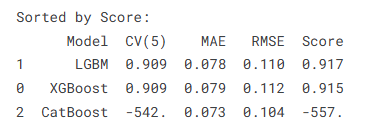

### Blending

모델별로 다른 가중치를 부여해 합치는거.
지금 필자는 위 점수르 기반으로 랜덤으로 가중치를 부여했고, 가중치 또한 튜닝을 통해 더 나은 정확도를 얻을 수도 있음.

In [ ]:
def blend_models_predict(X, b, c, d):
  return ((b* xgb.predict(X)) + (c * lgbm.predict(X)) + (d * cb.predict(X)))

In [ ]:
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("../../kaggle/working/submission.csv", index=False)